# Assignment 3 - Divide-n-Conquer Algorithms in Python

_This assignment is a part of the course ["Data Structures and Algorithms in Python"](https://jovian.ai/learn/data-structures-and-algorithms-in-python)._

In this assignment, you will implement an efficient algorithm for polynomial multiplication.

As you go through this notebook, you will find the symbol **???** in certain places. To complete this assignment, you must replace all the **???** with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end. 

**Guidelines**

1. Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
2. Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
3. In some cases, you may need to add some code cells or new statements before or after the line of code containing the **???**. 
4. Since you'll be using a temporary online service for code execution, save your work by running `jovian.commit` at regular intervals.
5. Questions marked **(Optional)** will not be considered for evaluation, and can be skipped. They are for your learning.
6. If you are stuck, you can ask for help on the [community forum] (TODO - add link). Post errors or ask for hints, but **please don't ask for OR share the full working answer code** on the forum.
7. There are some tests included with this notebook to help you test your implementation. However, after submission your code will be tested with some hidden test cases. Make sure to test your code exhaustively to cover all edge cases.


**Important Links**

* Submit your work here: https://jovian.ai/learn/data-structures-and-algorithms-in-python/assignment/assignment-3-sorting-and-divide-conquer-practice
* Ask questions and get help: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/assignment-3/89
* Lesson 3 video for review: https://jovian.ai/learn/data-structures-and-algorithms-in-python/lesson/lesson-3-sorting-algorithms-and-divide-and-conquer
* Lesson 3 notebook for review: https://jovian.ai/aakashns/python-sorting-divide-and-conquer


### How to Run the Code and Save Your Work

**Option 1: Running using free online resources (1-click, recommended)**: Click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


**Option 2: Running on your computer locally**: To run the code on your computer locally, you'll need to set up [Python](https://www.python.org) & [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/), download the notebook and install the required libraries. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

**Saving your work**: You can save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later and continue your work. Keep saving your work by running `jovian.commit` from time to time.

In [2]:
#project='python-divide-and-conquer-assignment'

In [3]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import jovian

## Problem Statement - Polynomial Multiplication

> Given two polynomials represented by two lists, write a function that efficiently multiplies given two polynomials. For example, the lists `[2, 0, 5, 7]` and `[3, 4, 2]` represent the polynomials $2 + 5x^2 + 7x^3$ and $3 + 4x + 2x^2$. 
> 
> Their product is 
>
> $(2 \times 3) + (2 \times 4 + 0 \times 3)x + (2 \times 2 + 3 \times 5 + 4 \times 0)x^2 + (7 \times 3 + 5 \times 4 + 0 \times 2)x^3 + (7 \times 4 + 5 \times 2)x^4 + (7 \times 2)x^5$ i.e. 
>
>$6 + 8x + 19x^2 + 41x^3 + 38x^4 + 14x^5$
> 
>It can be represented by the list `[6, 8, 19, 41, 38, 14]`.


## The Method

Here's the systematic strategy we'll apply for solving problems:

1. State the problem clearly. Identify the input & output formats.
2. Come up with some example inputs & outputs. Try to cover all edge cases.
3. Come up with a correct solution for the problem. State it in plain English.
4. Implement the solution and test it using example inputs. Fix bugs, if any.
5. Analyze the algorithm's complexity and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

This approach is explained in detail in [Lesson 1](https://jovian.ai/learn/data-structures-and-algorithms-in-python/lesson/lesson-1-binary-search-linked-lists-and-complexity) of the course. Let's apply this approach step-by-step.

## Solution


### 1. State the problem clearly. Identify the input & output formats.

While this problem is stated clearly enough, it's always useful to try and express in your own words, in a way that makes it most clear for you. 


**Problem**

> We need to write a program to efficiently multiply 2 polynomials together.

<br/>


**Input**

1. `poly1`: A list of numbers representing the first polynomial. E.g: `[2, 0, 5, 7]`.
2. `poly2`: A list of numbers representing the second polynomial. E.g: `[3, 4, 2]`.



**Output**

1. `product`: A list of numbers representing the product of the 2 polynomials. E.g: `[6, 8, 19, 41, 38, 14]` in the above case.


<br/>

Based on the above, we can now create a signature of our function:

In [5]:
def multiply(poly1, poly2):
    pass

### 2. Come up with some example inputs & outputs. Try to cover all edge cases.

Our function should be able to handle any set of valid inputs we pass into it. List a few scenarios here:

1. 2 unequal length lists
2. 2 equal length lists
3. lists containing negative numbers
4. 1 empty list
5. 2 empty lists
6. list containing all 0's
7. 1 element lists (degree 0 polynomials)


(add more if required)


Create a test case of each of the above scenarios. We'll express our test cases as dictionaries, to test them easily. Each dictionary will contain 2 keys: `input` (a dictionary itself containing one key for each argument to the function and `output` (the expected result from the function). 

In [56]:
test0 = {
    'input': {
        'poly1': [2, 0, 5, 7],
        'poly2': [3, 4, 2]
    },
    'output': [6, 8, 19, 41, 38, 14]
}

In [57]:
test1 = {
    'input': {
        'poly1': [3, 1, 9],
        'poly2': [1, 7, 5]
    },
    'output': [3, 22, 31, 68, 45]
}

In [58]:
test2 = {
    'input': {
        'poly1': [-3, 7, 11, -4],
        'poly2': [1, 2, -8]
    },
    'output': [-3, 1, 49, -38, -96, 32]
}

In [59]:
test3 = {
    'input': {
        'poly1': [7, 16, -4],
        'poly2': []
    },
    'output': []
}

In [60]:
test4 = {
    'input': {
        'poly1': [],
        'poly2': []
    },
    'output': []
}

In [61]:
test5 = {
    'input': {
        'poly1': [2, 5, 1],
        'poly2': [0, 0]
    },
    'output': [0, 0, 0, 0]
}

In [62]:
test6 = {
    'input': {
        'poly1': [5],
        'poly2': [3]
    },
    'output': [15]
}

Let's store all the test cases in a list, for easier automated testing.

In [63]:
tests = [test0, test1, test2, test3, test4, test5, test6]

### 3. Come up with a correct solution for the problem. State it in plain English.

Our first goal should always be to come up with a _correct_ solution to the problem, which may not necessarily be the most _efficient_ solution. 

Here's the simplest solution: If you have lists `poly1` and `poly2` representing polynomials of length $m$ and $n$ respectively, the highest degree of the exponents are $m-1$ and $n-1$ respectively. Their product has the degree $(m - 1) + (n - 1)$ i.e $m + n - 2$. The list representing the product has the length $m + n - 1$. So, we can create a list `result` of length $m + n - 1$, and set 

`result[k]` = Sum of all the pairs `poly1[i] * poly2[j]` where `i+j = k`

Example:

$(2 + 5x^2 + 7x^3) \times (3 + 4x + 2x^2)$

$= (2 \times 3) + (2 \times 4 + 0 \times 3)x + (2 \times 2 + 3 \times 5 + 4 \times 0)x^2 + (7 \times 3 + 5 \times 4 + 0 \times 2)x^3 + (7 \times 4 + 5 \times 2)x^4 + (7 \times 2)x^5$

$= 6 + 8x + 19x^2 + 41x^3 + 38x^4 + 14x^5$






Explain this solution in your own words below:

1. Create a variable `m` with value equal to length of list poly1.
2. Create a variable `n` with value equal to length of list poly2.
3. Create a list `result` of length m + n - 1.
4. Loop through both `poly1` and `poly2` with loop variables `i` and `j` respectively.
5. Inside the loop, create a variable `k` with value equal to i + j.
6. Multiply ith element of poly1 and jth element of poly2 and add it to kth element of result.
7. Loop ends, return the list result.

(add more steps if required)


Let's save and upload our work before continuing.



###  4. Implement the solution and test it using example inputs. Fix bugs, if any.

Implement the solution

In [64]:
def multiply_basic(poly1, poly2):
    m = len(poly1)
    n = len(poly2)
    if m == 0 or n == 0:
      return []
    result = [0] * (m + n - 1)
    for i in range(m):
      for j in range(n):
        k = i + j
        result[k] += poly1[i] * poly2[j]
    return result

Test your solution using the test cases you've defined above.

In [65]:
def evaluate_test_cases(tests, function):   
    i = 0
    count = 0
    for test in tests:
        print("Test Case:", i)
        p1 = test['input']['poly1']
        p2 = test['input']['poly2']
        print("   Polynomial1:", p1)
        print("   Polynomial2:", p2)
        print("   Expected Output:", test['output'])
        res = function(p1, p2)
        print("   Output:", res)
        if res == test['output']:
            print("   Test Case Passed")
            count += 1     
        else:
            print("   Test Case Failed")
        i += 1
    print(count, '/', len(tests), "Test Cases Passed")

In [66]:
evaluate_test_cases(tests, multiply_basic)

Test Case: 0
   Polynomial1: [2, 0, 5, 7]
   Polynomial2: [3, 4, 2]
   Expected Output: [6, 8, 19, 41, 38, 14]
   Output: [6, 8, 19, 41, 38, 14]
   Test Case Passed
Test Case: 1
   Polynomial1: [3, 1, 9]
   Polynomial2: [1, 7, 5]
   Expected Output: [3, 22, 31, 68, 45]
   Output: [3, 22, 31, 68, 45]
   Test Case Passed
Test Case: 2
   Polynomial1: [-3, 7, 11, -4]
   Polynomial2: [1, 2, -8]
   Expected Output: [-3, 1, 49, -38, -96, 32]
   Output: [-3, 1, 49, -38, -96, 32]
   Test Case Passed
Test Case: 3
   Polynomial1: [7, 16, -4]
   Polynomial2: []
   Expected Output: []
   Output: []
   Test Case Passed
Test Case: 4
   Polynomial1: []
   Polynomial2: []
   Expected Output: []
   Output: []
   Test Case Passed
Test Case: 5
   Polynomial1: [2, 5, 1]
   Polynomial2: [0, 0]
   Expected Output: [0, 0, 0, 0]
   Output: [0, 0, 0, 0]
   Test Case Passed
Test Case: 6
   Polynomial1: [5]
   Polynomial2: [3]
   Expected Output: [15]
   Output: [15]
   Test Case Passed
7 / 7 Test Cases Passed


### 5. Analyze the algorithm's complexity and identify inefficiencies, if any.

Can you analyze the time and space complexity of this algorithm?

In [33]:
multiply_basic_time_complexity = 'O(mn)'

In [34]:
multiply_basic_space_complexity = 'O(m+n)'

### 6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

We can apply the divide and conquer technique to solve this problem more efficiently. Given two polynomials `A` and `B`, we can express each of them as a sum of two polynomials as follows:

<img src="https://i.imgur.com/FjKQF5h.png" width="480">

We need to compute the terms `A0 * B0`, `A1 * B0 + A0 * B1` and `A1 * B1`. This can obviously be done using 4 multiplications, but here's a way of doing it with just three multiplications:

<img src="https://i.imgur.com/G3vD1GX.png" width="480">


Each of the products can themselves be computed recursively. For a more detailed explanation of this approach see http://www.cse.ust.hk/~dekai/271/notes/L03/L03.pdf .


Need help? Discuss and ask questions on the forum: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/assignment-3/89


### 7. Come up with a correct solution for the problem. State it in plain English.

Explain the approach described above in your own words below:

1. Base Cases: If either `poly1` or `poly2` empty, then return empty list.
2. Split `poly1` and `poly2` into 2 parts each(A0, A1 and B0, B1).
3. Compute `Y`, `U` and `Z` recursively by calling the function again.
4. Using Y, U and Z, we can get the terms `A0 * B0`, `A1 * B0 + A0 * B1` and `A1 * B1`.
5. We then multiply second term by `x^(n//2)` and third term by `x^2*(n//2)`.
6. Add all 3 terms and return the result.

(add more steps if required)


Let's save and upload our work before continuing.

### 8. Implement the solution and test it using example inputs. Fix bugs, if any.

We are now ready to implement the solution. You may find the following functions `add`, `split` and `increase_exponent` useful.


In [35]:
def add(poly1, poly2):
    """Add two polynomials"""
    result = [0] * max(len(poly1), len(poly2))
    for i in range(len(result)):
        if i < len(poly1):
            result[i] += poly1[i]
        if i < len(poly2):
            result[i] += poly2[i]
    return result

In [36]:
add([1, 2, 3, 4], [0, 4, 3])

[1, 6, 6, 4]

In [37]:
def split(poly1, poly2):
    """Split each polynomial into two smaller polynomials"""
    mid = max(len(poly1), len(poly2)) // 2
    return  (poly1[:mid], poly1[mid:]), (poly2[:mid], poly2[mid:])

In [38]:
split([1, 2, 3, 4], [0, 4, 3, 6, 7, 8, 2])

(([1, 2, 3], [4]), ([0, 4, 3], [6, 7, 8, 2]))

In [39]:
a, b = split([1, 2, 3, 4], [0, 4, 3, 6, 7, 8, 2])
a0,a1 = a
b0,b1 = b
split(a0,a1)

(([1], [2, 3]), ([4], []))

In [40]:
def increase_exponent(poly, n):
    """Multiply poly1 by x^n"""
    return [0] * n + poly

In [41]:
increase_exponent([1, 2, 3, 4], 3)

[0, 0, 0, 1, 2, 3, 4]

Implement the optimized multiplication algorithm below. You may use the some or all of the helper functions defined above.

In [69]:
def multiply_optimized(poly1, poly2, depth=0):
    #print('   '*depth, 'input', poly1, poly2)
    m = len(poly1)
    n = len(poly2)
    if m == 0 or n == 0:
      return []
    if m == 1 and n == 1:
        return [poly1[0] * poly2[0]]
    A, B = split(poly1, poly2)
    A0, A1 = A 
    B0, B1 = B
    Y = multiply_optimized(add(A0, A1), add(B0, B1), depth+1)
    U = multiply_optimized(A0, B0, depth+1)
    Z = multiply_optimized(A1, B1, depth+1)
    term1 = U
    term2 = add(U, Z)
    term2 = [-num for num in term2]
    term2 = add(Y, term2)
    term2 = increase_exponent(term2, max(m, n)//2)
    term3 = increase_exponent(Z, 2 * (max(m, n)//2))
    answer = add(term1, add(term2, term3))
    #print('   '*depth, 'output', answer)
    return answer

Test your solution using the empty cells below.

In [70]:
evaluate_test_cases(tests, multiply_optimized)

Test Case: 0
   Polynomial1: [2, 0, 5, 7]
   Polynomial2: [3, 4, 2]
   Expected Output: [6, 8, 19, 41, 38, 14]
   Output: [6, 8, 19, 41, 38, 14]
   Test Case Passed
Test Case: 1
   Polynomial1: [3, 1, 9]
   Polynomial2: [1, 7, 5]
   Expected Output: [3, 22, 31, 68, 45]
   Output: [3, 22, 31, 68, 45]
   Test Case Passed
Test Case: 2
   Polynomial1: [-3, 7, 11, -4]
   Polynomial2: [1, 2, -8]
   Expected Output: [-3, 1, 49, -38, -96, 32]
   Output: [-3, 1, 49, -38, -96, 32]
   Test Case Passed
Test Case: 3
   Polynomial1: [7, 16, -4]
   Polynomial2: []
   Expected Output: []
   Output: []
   Test Case Passed
Test Case: 4
   Polynomial1: []
   Polynomial2: []
   Expected Output: []
   Output: []
   Test Case Passed
Test Case: 5
   Polynomial1: [2, 5, 1]
   Polynomial2: [0, 0]
   Expected Output: [0, 0, 0, 0]
   Output: [0, 0, 0, 0]
   Test Case Passed
Test Case: 6
   Polynomial1: [5]
   Polynomial2: [3]
   Expected Output: [15]
   Output: [15]
   Test Case Passed
7 / 7 Test Cases Passed


## Make a Submission

Congrats! You have now implemented hash tables from scratch. The rest of this assignment is optional.

You can make a submission on this page: https://jovian.ai/learn/data-structures-and-algorithms-in-python/assignment/assignment-3-sorting-and-divide-conquer-practice

Submit the link to your Jovian notebook (the output of the previous cell).
You can also make a direct submission by executing the following cell:

In [71]:
#jovian.submit(assignment="pythondsa-assignment3")

### (Optional) 9. Analyze the algorithm's complexity and identify inefficiencies, if any.

Can you analyze the time and space complexity of this algorithm? 

Hint: See the tree of subproblems below ([source](https://myithelpcentral.blogspot.com/2015/09/o-logn-notation-explanation-for-binary.html)). Substitute the right values for `n` and `b` to determine the time complexity.

![](https://i.imgur.com/JAmZrE5.png)

* b = 2, each subproblem is of size n/2
* At each level, each subproblem splits into 3
* At level 0, n
* At level 1, 3*n/2
* At level k, (3/2)^k * n
* Summing all the terms for all levels until level = height - 1 to find time complexity.
* Formula: Sum from 0 to h-1 of (3/2)^k * n
* Answer is n^lg(3)

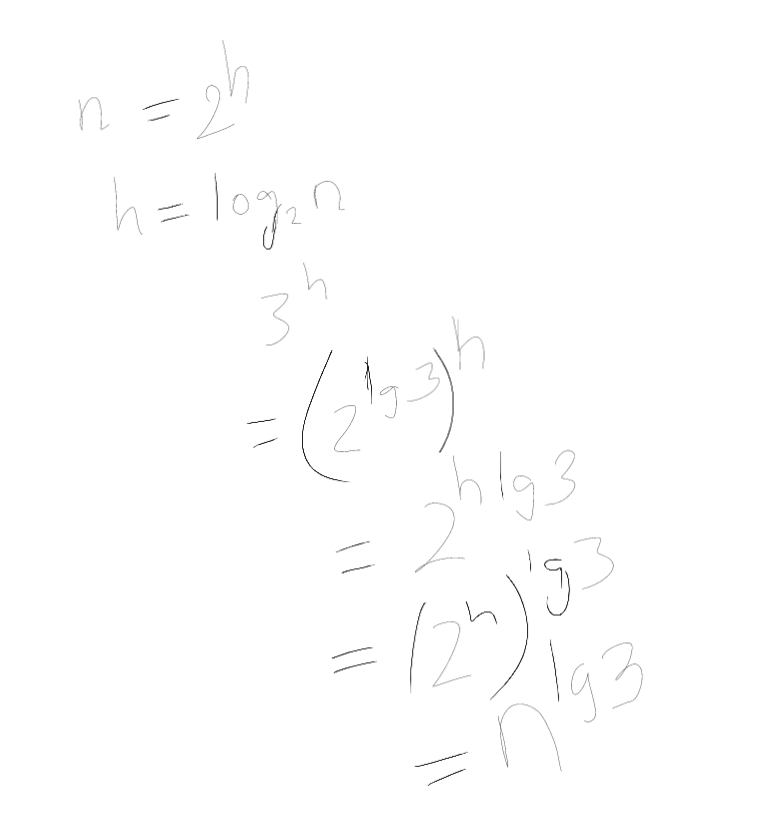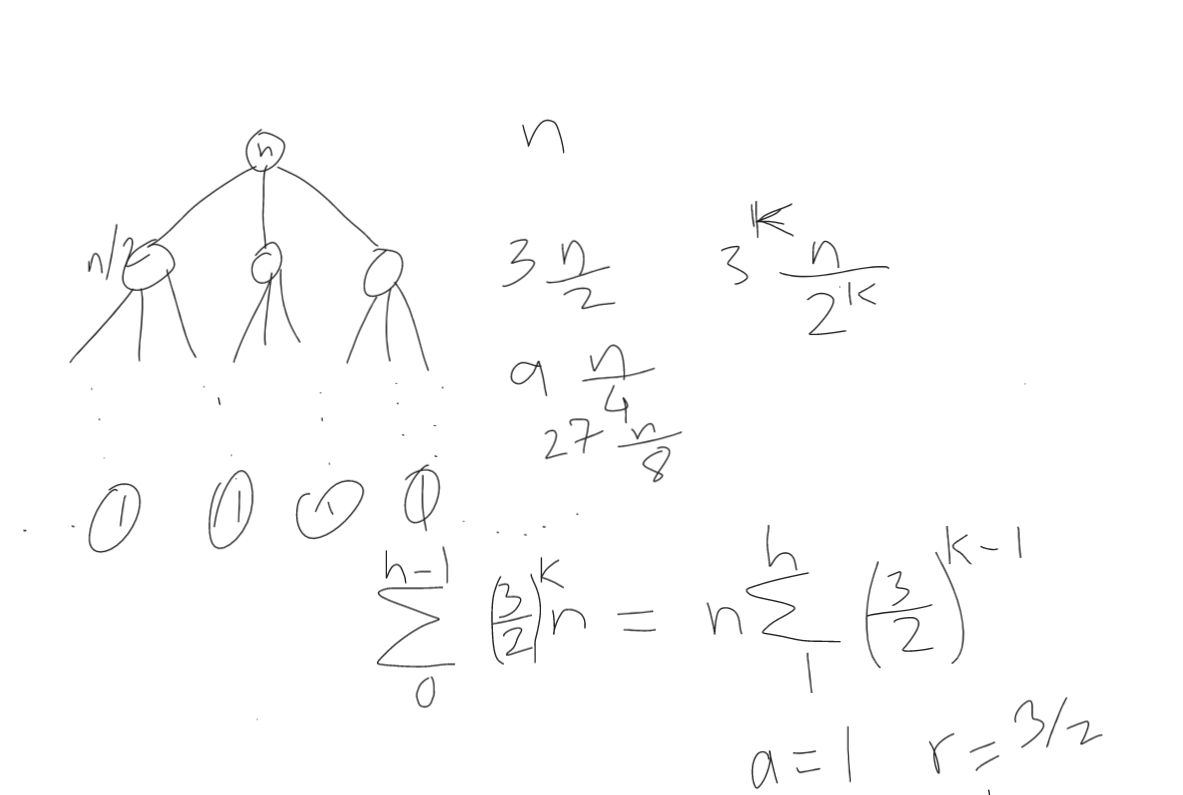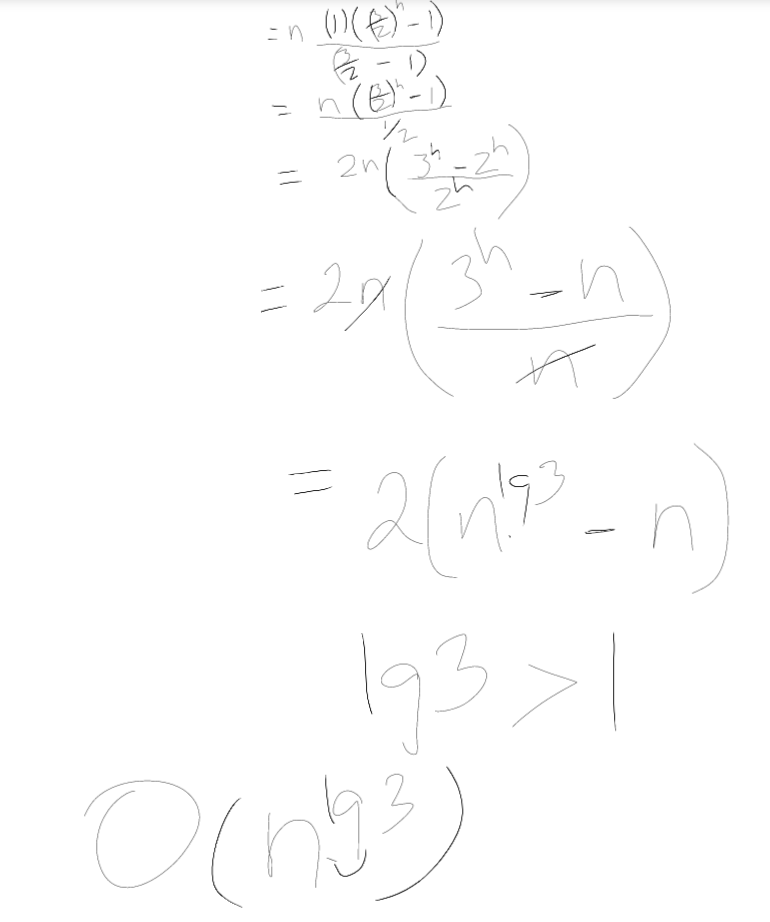